## Visibility RPM

In [1]:
from IPEnvironmentShapeRobot import CollisionCheckerShapeRobot
from IPEnvironmentShapeRobot import ShapeRobot, ShapeRobotWithOrientation
from shapely.geometry import Point, Polygon, LineString
from shapely.affinity import scale, translate
import matplotlib.pyplot as plt

import numpy as np

# Definition of a testing environment
obs1 = LineString([(5,18),(5,8),(20,8),(20,18)]).buffer(1.0)
obs2 = LineString([(13,15), (13,25), (30,25), (40,25), (30,25), (30,10)]).buffer(1.0)

# obs2 = scale(obs1, yfact=-1, origin='center')
# obs2 = translate(obs2, xoff=10, yoff=7)
trapField = dict()
trapField["obs1"] = obs1
trapField["obs2"] = obs2

# define robot geometry
robot_shape = Polygon([
    (-0.5, -0.5),  # unten links
    (3, -0.5),     # unten rechts
    (3, 0.0),      # Innenknick rechts
    (0.5, 0.0),    # Innenknick unten horizontal
    (0.5, 1.0),    # oben links vom L-Schenkel
    (-0.5, 1.0)    # oben links außen
])
shape_robot = ShapeRobotWithOrientation(robot_shape, limits=[[0.0, 40.0], [0.0, 40.0], [-np.pi, np.pi]])

environment = CollisionCheckerShapeRobot(trapField, shape_robot)

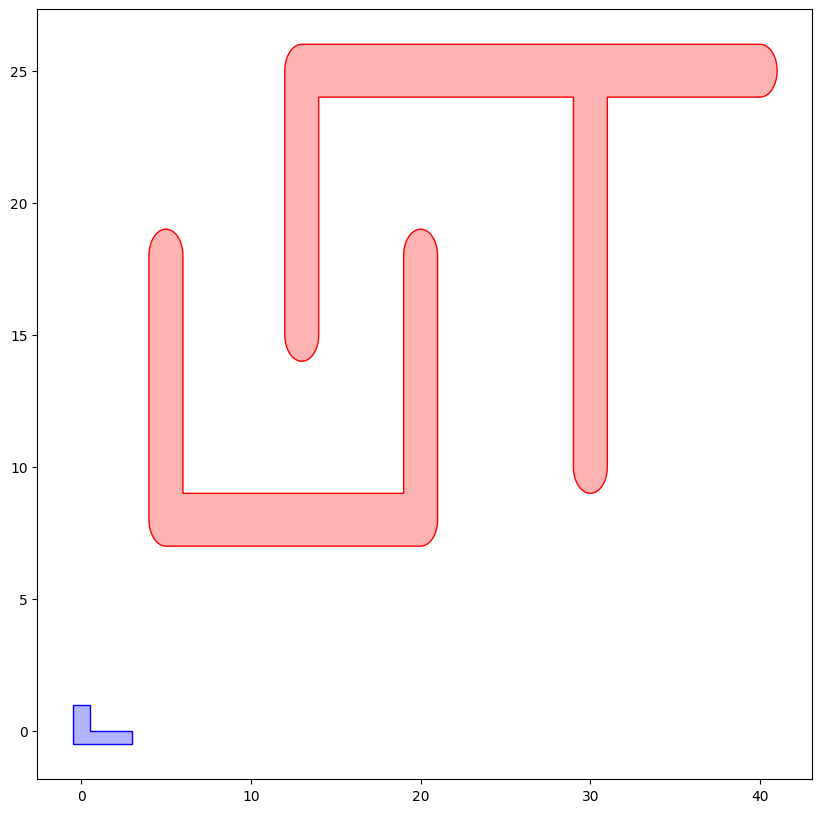

In [2]:
# define robot geometry

fig_local = plt.figure(figsize=(10,10))
ax = fig_local.add_subplot(1,1,1)
environment.drawObstacles(ax)

In [3]:
from IPVisibilityPRM import VisPRM 

visPRM = VisPRM(environment)
visConfig = dict()
visConfig["radius"] = 10
visConfig["ntry"] = 200

start = [[35,15,0]]
goal  = [[15,12,0]]

solution = visPRM.planPath(start, goal, visConfig)

if len(solution) == 0:
    print("No solution found")

solution

['start', 2, 47, 1, 84, 80, 239, 'goal']

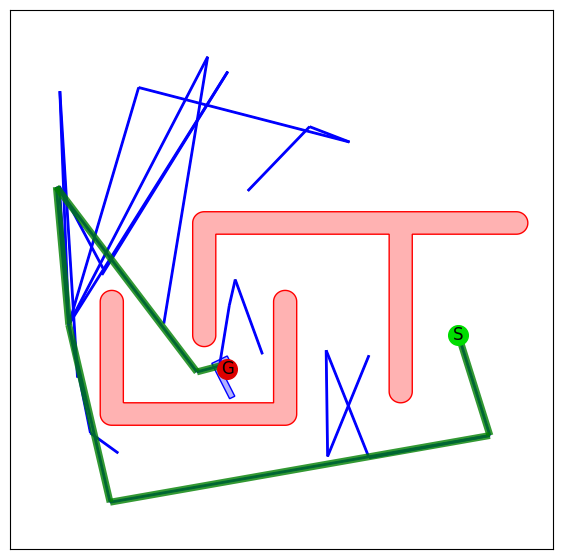

In [4]:
from IPVISVisibilityPRM import visibilityPRMVisualize
fig_local = plt.figure(figsize=(7,7))
ax = fig_local.add_subplot(1,1,1)
visibilityPRMVisualize(visPRM,solution,ax=ax)

In [5]:
import copy
def interpolate_line(startPos, endPos, step_l):
    steps = []
    line = np.array(endPos) - np.array(startPos)
    line_l = np.linalg.norm(line)
    step = line / line_l * step_l
    n_steps = np.floor(line_l / step_l).astype(np.int32)
    c_step = np.array(startPos, dtype=np.float32)
    for i in range(n_steps):
        steps.append(copy.deepcopy(c_step))
        c_step += step
    if not (c_step == np.array(endPos)).all():
        steps.append(np.array(endPos))
    return steps


## Smooth the path

### Use generic smoother

In [6]:
import networkx as nx
from SmoothGeneric import SmoothGeneric

smoother = SmoothGeneric(visPRM, solution)
smoothed_path, smoothed_graph = smoother.smooth_path()

print("Solution before: ", solution)
id_counter = 0
color = "#e28a0e"

print("Solution after: ", smoother.smoothed_path)


TypeError: SmoothGeneric.smooth_path() missing 1 required positional argument: 'config'

### Visualize

/home/anton/.local/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


/home/anton/.local/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


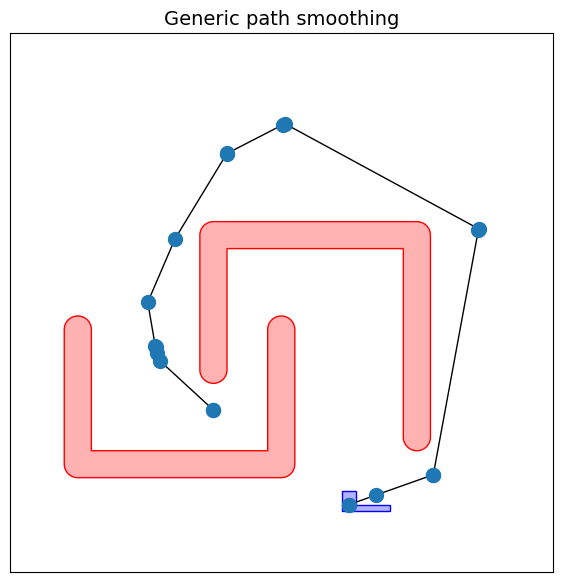

In [ ]:
smoother.visualize_smoothing(title="Generic path smoothing")
smoother.animate_path(solution, title="Smoothed animation")